In [1]:
import pandas as pd
pd.options.display.max_columns = 100

from plotnine import *

In [21]:
# http://www.ifs.tuwien.ac.at/mir/msd/MASD.html

df = pd.read_clipboard()

In [22]:
df.columns = [c.lower().replace(' ','_') for c in df.columns]
df.loc[:,'number_of_tracks'] = pd.to_numeric(df['number_of_tracks'].str.replace(',',''))
df.loc[:, 'share'] = df['number_of_tracks'] / df['number_of_tracks'].sum()
genre_list = df.sort_values('share', ascending=False)['genre_name'].tolist()
df.loc[:, 'genre'] = pd.Categorical(df['genre_name'], categories=genre_list)
df.loc[:,'is_rock'] = df['genre'].map(lambda s: 1 if 'Rock' in s else 0)

/Users/andrewsang/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


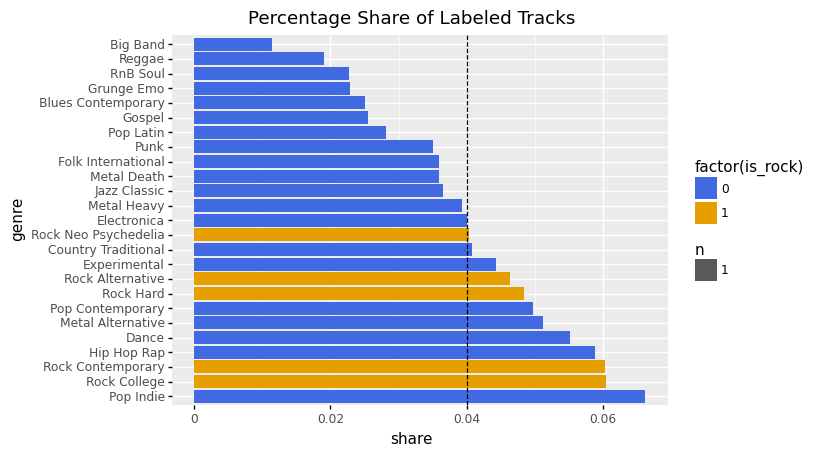

<ggplot: (7020835025)>

In [33]:
(ggplot(df, aes(x='genre', y='share', fill='factor(is_rock)')) + 
    geom_bar(stat = "sum") + 
    geom_hline(color='black', linetype='dashed', yintercept=0.04) + 
    ggtitle('Percentage Share of Labeled Tracks') +
    scale_fill_manual(values=["#4169E1","#E69F00"]) +
    coord_flip())

In [1]:
# Loss Function example

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

p = np.linspace(0,1,num=100)
df = pd.DataFrame(p, columns=['p'])
df.loc[:,'loss'] = df['p'].map(lambda s: -1*np.log(s))

/Users/andrewsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


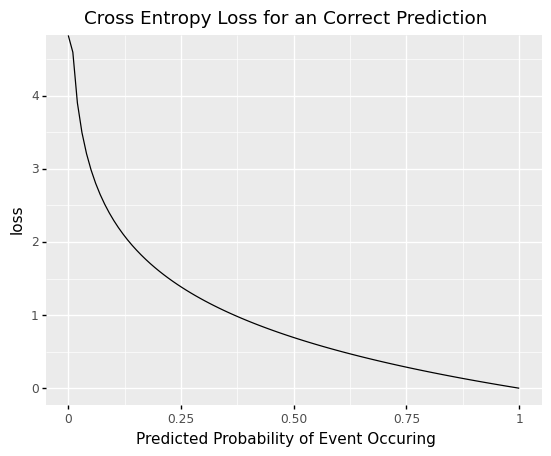

<ggplot: (7019856321)>

In [3]:
(ggplot(df, aes(x='p',y='loss')) +
     geom_line() + 
     ggtitle('Cross Entropy Loss for an Correct Prediction') + 
     xlab('Predicted Probability of Event Occuring'))

In [1]:
import h2o

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.1" 2018-10-16 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.1+13-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.1+13-LTS, mixed mode)
  Starting server from /Users/andrewsang/opt/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/zt/pvf5q9vd0wd8r31bcqn7j6zw0000gn/T/tmpexh0an5h
  JVM stdout: /var/folders/zt/pvf5q9vd0wd8r31bcqn7j6zw0000gn/T/tmpexh0an5h/h2o_andrewsang_started_from_python.out
  JVM stderr: /var/folders/zt/pvf5q9vd0wd8r31bcqn7j6zw0000gn/T/tmpexh0an5h/h2o_andrewsang_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.1
H2O_cluster_version_age:,"28 days, 2 hours and 55 minutes"
H2O_cluster_name:,H2O_from_python_andrewsang_0j1mip
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [8]:
gbm = h2o.load_model('../nbs/models/GBM_model_python_1599409688140_8')
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1599409688140_8


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,47.0,1175.0,487631.0,5.0,5.0,5.0,21.0,32.0,28.258724




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.5098219210907774
RMSE: 0.7140181517936203
LogLoss: 1.5268073669281312
Mean Per-Class Error: 0.36689943510996703

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Big_Band,Blues_Contemporary,Country_Traditional,Dance,Electronica,Experimental,Folk_International,Gospel,Grunge_Emo,Hip_Hop_Rap,...,Punk,Reggae,RnB_Soul,Rock_Alternative,Rock_College,Rock_Contemporary,Rock_Hard,Rock_Neo_Psychedelia,Error,Rate
0,2935.0,0.0,69.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,13.0,68.0,82.0,693.0,67.0,81.0,0.354945,"1,615 / 4,550"
1,0.0,2754.0,115.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,...,0.0,0.0,24.0,12.0,148.0,773.0,403.0,12.0,0.394193,"1,792 / 4,546"
2,6.0,4.0,3481.0,0.0,4.0,17.0,8.0,5.0,8.0,8.0,...,6.0,4.0,0.0,45.0,96.0,423.0,92.0,4.0,0.229867,"1,039 / 4,520"
3,0.0,0.0,31.0,2317.0,35.0,76.0,25.0,20.0,29.0,234.0,...,4.0,8.0,29.0,95.0,132.0,402.0,123.0,12.0,0.487503,"2,204 / 4,521"
4,0.0,0.0,5.0,45.0,2785.0,60.0,10.0,10.0,28.0,136.0,...,16.0,0.0,5.0,63.0,340.0,269.0,51.0,11.0,0.388181,"1,767 / 4,552"
5,6.0,0.0,18.0,33.0,33.0,2259.0,12.0,9.0,11.0,24.0,...,57.0,0.0,3.0,36.0,390.0,273.0,315.0,54.0,0.503516,"2,291 / 4,550"
6,0.0,0.0,77.0,17.0,5.0,32.0,2588.0,15.0,0.0,82.0,...,18.0,6.0,0.0,55.0,76.0,719.0,99.0,54.0,0.432456,"1,972 / 4,560"
7,0.0,5.0,88.0,10.0,4.0,15.0,10.0,3024.0,30.0,39.0,...,14.0,4.0,5.0,65.0,75.0,364.0,121.0,50.0,0.332598,"1,507 / 4,531"
8,0.0,0.0,5.0,15.0,19.0,33.0,0.0,6.0,2593.0,9.0,...,74.0,0.0,0.0,39.0,340.0,163.0,160.0,127.0,0.430610,"1,961 / 4,554"
9,1.0,1.0,7.0,20.0,8.0,7.0,4.0,14.0,6.0,3900.0,...,14.0,3.0,19.0,7.0,16.0,116.0,33.0,8.0,0.135447,"611 / 4,511"



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.632961
1,2,0.755600
2,3,0.818458
3,4,0.856780
4,5,0.883954
5,6,0.901176
6,7,0.913748
7,8,0.925889
8,9,0.935243
9,10,0.942900



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.7129230987907577
RMSE: 0.8443477357053536
LogLoss: 2.3963201567792765
Mean Per-Class Error: 0.7716919663112146

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Big_Band,Blues_Contemporary,Country_Traditional,Dance,Electronica,Experimental,Folk_International,Gospel,Grunge_Emo,Hip_Hop_Rap,...,Punk,Reggae,RnB_Soul,Rock_Alternative,Rock_College,Rock_Contemporary,Rock_Hard,Rock_Neo_Psychedelia,Error,Rate
0,12.0,0.0,7.0,1.0,0.0,0.0,1.0,3.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,36.0,9.0,0.0,0.865169,77 / 89
1,4.0,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,0.0,5.0,0.0,6.0,16.0,3.0,0.0,0.958333,69 / 72
2,2.0,4.0,231.0,1.0,0.0,4.0,1.0,1.0,1.0,4.0,...,1.0,0.0,3.0,0.0,5.0,88.0,8.0,1.0,0.403101,156 / 387
3,0.0,0.0,2.0,28.0,11.0,5.0,3.0,1.0,0.0,25.0,...,2.0,3.0,10.0,2.0,5.0,39.0,10.0,3.0,0.891051,229 / 257
4,0.0,0.0,0.0,14.0,0.0,7.0,1.0,0.0,0.0,23.0,...,3.0,0.0,2.0,13.0,37.0,35.0,3.0,1.0,1.000000,215 / 215
5,0.0,0.0,5.0,2.0,4.0,45.0,4.0,3.0,7.0,0.0,...,6.0,1.0,0.0,9.0,41.0,29.0,44.0,14.0,0.856230,268 / 313
6,3.0,0.0,12.0,1.0,0.0,9.0,7.0,0.0,4.0,4.0,...,1.0,0.0,3.0,18.0,5.0,40.0,13.0,2.0,0.960227,169 / 176
7,0.0,0.0,6.0,2.0,1.0,1.0,0.0,36.0,0.0,1.0,...,1.0,2.0,0.0,5.0,2.0,31.0,16.0,0.0,0.760000,114 / 150
8,0.0,0.0,0.0,7.0,1.0,15.0,0.0,2.0,13.0,0.0,...,13.0,0.0,0.0,49.0,54.0,41.0,25.0,16.0,0.967419,386 / 399
9,0.0,0.0,0.0,5.0,5.0,0.0,3.0,8.0,1.0,371.0,...,0.0,3.0,23.0,0.0,6.0,35.0,5.0,1.0,0.321755,176 / 547



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.289814
1,2,0.453630
2,3,0.562999
3,4,0.644717
4,5,0.702014
5,6,0.744584
6,7,0.779456
7,8,0.809198
8,9,0.833143
9,10,0.857088



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2020-09-07 10:02:39,0.005 sec,0.0,0.960307,3.486145,0.960008,0.943985,3.005400,0.908020
1,,2020-09-07 10:02:44,4.486 sec,1.0,0.948401,3.201140,0.841791,0.937184,2.901251,0.818985
2,,2020-09-07 10:02:48,9.015 sec,2.0,0.937920,3.021229,0.761253,0.931369,2.833488,0.771570
3,,2020-09-07 10:02:53,13.501 sec,3.0,0.928132,2.884397,0.720083,0.926114,2.782077,0.746579
4,,2020-09-07 10:03:01,21.931 sec,5.0,0.910085,2.677962,0.650200,0.916512,2.703303,0.724249
5,,2020-09-07 10:03:05,25.942 sec,6.0,0.901703,2.596662,0.620248,0.912282,2.673522,0.719783
6,,2020-09-07 10:03:12,33.008 sec,8.0,0.885930,2.458970,0.584714,0.904615,2.623983,0.717598
7,,2020-09-07 10:03:20,40.499 sec,10.0,0.871303,2.345794,0.557241,0.897854,2.585021,0.712752
8,,2020-09-07 10:03:27,47.806 sec,12.0,0.857765,2.250500,0.530277,0.891891,2.553455,0.712372
9,,2020-09-07 10:03:34,54.787 sec,14.0,0.845014,2.167682,0.504237,0.886451,2.527648,0.711136



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,music_Hip_Hop_Rap,24284.751953,1.000000,0.035256
1,img_Blues_Contemporary,24186.550781,0.995956,0.035113
2,img_Big_Band,23702.820312,0.976037,0.034411
3,music_Metal_Death,23079.976562,0.950390,0.033507
4,music_Jazz_Classic,20462.355469,0.842601,0.029707
5,lyr_Pop_Latin,20219.251953,0.832590,0.029354
6,img_Metal_Heavy,20078.277344,0.826785,0.029149
7,img_Reggae,19821.611328,0.816216,0.028776
8,img_Grunge_Emo,19456.593750,0.801186,0.028247
9,img_Electronica,19449.025391,0.800874,0.028236



See the whole table with table.as_data_frame()


In [9]:
gbm.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_model_python_1599409688140_8',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_model_python_1599409688140_8'},
  'input': None},
 'training_frame': {'default': None, 'actual': None, 'input': None},
 'validation_frame': {'default': None, 'actual': None, 'input': None},
 'nfolds': {'default': 0, 'actual': 0, 'input': 0},
 'keep_cross_validation_models': {'default': True,
  'actual': True,
  'input': True},
 'keep_cross_validation_predictions': {'default': False,
  'actual': False,
  'input': False},
 'keep_cross_validation_fold_assignment': {'default': False,
  'actual': False,
  'input': False},
 'score_each_iteration': {'default': False, 'actual': False, 'input': False},
 'score_tree_interval': {'default': 0, 'actual': 0, 'input': 0},
 'fold_assignment': {'default': 'AUTO', 'actual': None, 'input': 'AUTO'},
 'fold_column': {'de

## Latex

$\text{pseudo tf-idf score}_{g,w} = \frac{t_{g,w}}{t_{g}}\cdot \frac{log{(t)}}{t_{w}}$

$\text{levenshtein ratio} = (1 - \frac{d}{c})$

$\begin{bmatrix}x_{0} & x_{1} & x{_2}\end{bmatrix}
\begin{bmatrix} w_{0} \\ w_{1} \\ w_{2} \end{bmatrix}
$

$  \begin{matrix}
    \begin{bmatrix}x_{0} & x_{1} & x{_2}\end{bmatrix}\\\mbox{}\end{matrix}
  \begin{pmatrix} a & b \\ c & d \end{pmatrix} 
  \begin{pmatrix} x \\ y \end{pmatrix}$

$  \begin{matrix}\begin{pmatrix}x & y\end{pmatrix}\\\mbox{}\end{matrix}
  \begin{pmatrix} a & b \\ c & d \end{pmatrix} 
  \begin{pmatrix} x \\ y \end{pmatrix}$

In [21]:
import numpy as np
import pandas as pd
from plotnine import *

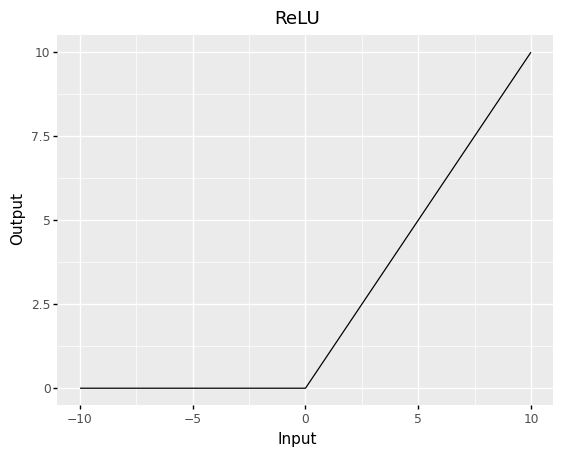

<ggplot: (1637664245)>

In [26]:
X = np.linspace(-10,10, num=1000)
y = np.maximum(np.zeros(X.shape[0]), X)
df = pd.DataFrame(zip(X,y), columns=['x','y'])
ggplot(df, aes(x='x', y='y')) + geom_line() + ggtitle('ReLU') + xlab('Input') + ylab('Output')

$
\begin{equation*}
H =
A \left(
\begin{bmatrix}
W_{00} & W_{10} & W_{20} \\
W_{01} & W_{11} & W_{21}
\end{bmatrix}
\begin{bmatrix} X_{0} \\ X_{1} \\ X_{2} \end{bmatrix}
\right)
\end{equation*}
$

$
\begin{equation*}
O =
A \left(
\begin{bmatrix}
W_{0} & W_{1}
\end{bmatrix}
\begin{bmatrix} H_{0} \\ H_{1} \end{bmatrix}
\right)
\end{equation*}
$

In [30]:
from scipy.special import expit

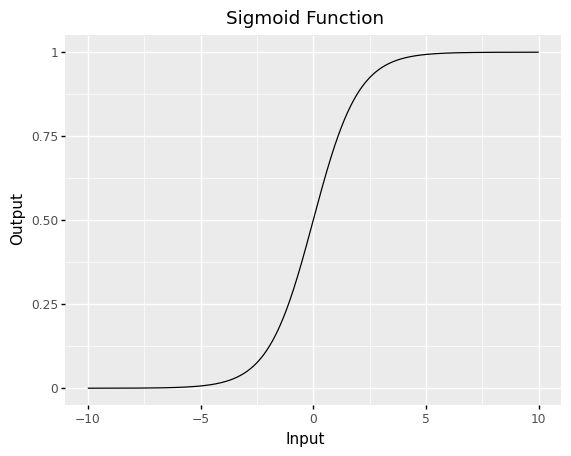

<ggplot: (7010349105)>

In [34]:
X = np.linspace(-10, 10, num=1000)
df = pd.DataFrame(zip(X, expit(X)), columns=['x','y'])
ggplot(df, aes(x='x',y='y')) + geom_line() + ggtitle('Sigmoid Function') + xlab('Input') + ylab('Output')

$p = \dfrac{e_{j}}{\sum_{i=1}^{n} e_i}$

$-(y \cdot log(p)+(1−y) \cdot log(1−p))$